## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [9]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [10]:
import requests
response = requests.get(target_url)
#print(response)
data = response.text
print(data)
# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
n00015388_238	http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
n00015388_304	http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
n00015388_327	http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
n00015388_355	http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
n00015388_373	http://img172.imageshack.us/img172/4606/napo03072en9.jpg
n00015388_379	http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg
n00015388_388	http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg
n00015388_442	http://www.porschemania.it/discus/messages/815/102099.jpg
n00015388_474	http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg
n00015388_514	http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg
n00015388_671	http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg
n00015388_686	http://farm1.static.flic

'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [11]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data = data.split(split_tag)
print(len(data))
print(data[0:4])
#data = data.split("\t")


9996
['n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg', 'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg', 'n00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg', 'n00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg']


arrange_data=[]
for i in range(len(data)):    
    line = data[i].split('\t')
    arrange_data.append(line)
print(arrange_data)

## 將 txt 轉成 pandas dataframe

In [12]:
import pandas as pd

arrange_data=[]
"""
for d in data:
    line = d.split("\t")
    arrange_data.append(line)
"""
for i in range(len(data)):    
    line = data[i].split('\t')
    arrange_data.append(line)
#print(arrange_data)

df = pd.DataFrame(arrange_data)
print(df.head())


               0                                                  1
0  n00015388_157  http://farm1.static.flickr.com/145/430300483_2...
1  n00015388_238  http://farm2.static.flickr.com/1005/3352960681...
2  n00015388_304  http://farm1.static.flickr.com/27/51009336_a96...
3  n00015388_327  http://farm4.static.flickr.com/3025/2444687979...
4  n00015388_355  http://img100.imageshack.us/img100/3253/forres...


In [13]:
first_link = df.loc[0][1]
print(first_link)

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


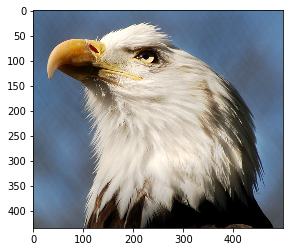

In [14]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0][1] #df.loc[0,1]
print(first_link)
#df['...']取出特定欄位,df['...'][0:5]取出前五筆
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((256,256)) # 假如 resize, 就先統一到 256 x 256
            img = np.array(img)
            img_list.append(img)
        except:
            # 只有在 response.status_code 為 200 時，才可以取得圖片，若有 404 或其他 status code, 會碰到 Error, 所以我們用 Try 語法避開取不到的狀況
            pass
    
    return img_list

In [17]:
def img2arr_fromURLs(url_list, resize = False):
    
    img_list =[]
    for im_get in url_list:
        response = requests.get(im_get)
        try:
            img = Image.open(BytesIO(response .content))
            if resize:
                img = img.resize((256,256))
            img = np.array(img)#可有可無
            img_list.append(img)
        except:
            pass
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    return img_list

Total images that we got: 4 


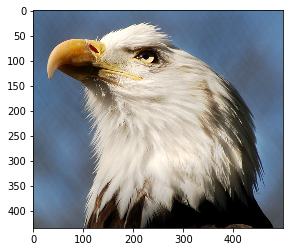

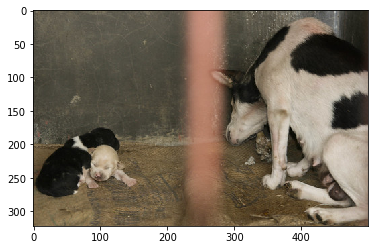

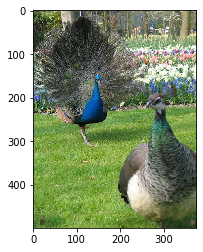

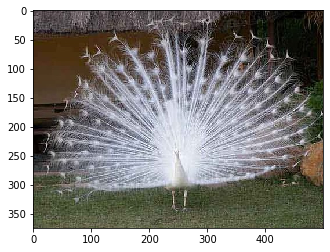

In [18]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()